In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42) #random state = 42

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
from sklearn.datasets import fetch_openml



In [2]:
 mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
28*28

784

In [6]:
y.shape

(70000,)

Saving figure some_digit_plot


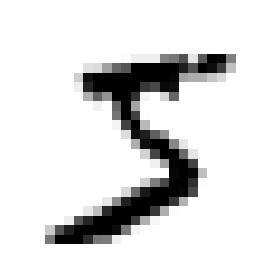

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [8]:
y[0]

'5'

In [9]:
import numpy as np
y = y.astype(np.uint8) #algorithm expect number

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]  #first 60000 is train, last 60000 is test

In [11]:
import pandas as pd

In [12]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)  # make it simple, try to identify only '5' first


In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5) #only train 5 for now

SGDClassifier(random_state=42)

In [14]:
#If you want reproducible results, you should set the random_state parameter.


In [15]:
sgd_clf.predict([some_digit])

array([ True])

In [16]:
# evaluating a classifier if often more tricky than regressor

In [17]:
from sklearn.model_selection import StratifiedKFold  #這是手工方法, validation
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # 3 folds
for train_index, test_index in skfolds.split(X_train, y_train_5):  #seperate train_set into train and validation
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index] 
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]  #take this as validation
    y_test_fold = y_train_5[test_index]  # split it as validation
    clone_clf.fit(X_train_folds, y_train_folds) # train model
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565, and 0.96495

0.9669
0.91625
0.96785


In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") #This is yes, false array

array([0.95035, 0.96035, 0.9604 ])

In [20]:
from sklearn.base import BaseEstimator

In [21]:
class Never5Classifier(BaseEstimator):  #The not 5 class
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [22]:
Never_5_clf = Never5Classifier()

In [23]:
cross_val_score(Never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [24]:
#That’s right, it has over 90% accuracy, if you always guess it's not 5, 90% will be correct

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # print the actual number

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [29]:
y_train_perfect_prediction = y_train_5  # pretend that we reach perfection

In [30]:
confusion_matrix(y_train_5, y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [31]:
from sklearn.metrics import precision_score, recall_score

In [32]:
precision_score(y_train_5, y_train_pred) 
# when you claim this as 5, this is the percentage that is actually correct

0.8370879772350012

In [33]:
recall_score(y_train_5, y_train_pred)
# Of all the 5s, this is the percentage that actually detected

0.6511713705958311

In [34]:
from sklearn.metrics import f1_score

In [35]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [36]:
y_scores = sgd_clf.decision_function([some_digit])

In [37]:
y_scores

array([2164.22030239])

In [38]:
threshold = 0

In [39]:
y_some_digit_pred = (y_scores > threshold)

In [40]:
y_some_digit_pred

array([ True])

In [41]:
threshold = 8000

In [42]:
y_some_digit_pred = (y_scores > threshold)

In [43]:
y_some_digit_pred

array([False])

In [44]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv =3, method="decision_function")

In [45]:
from sklearn.metrics import precision_recall_curve

In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

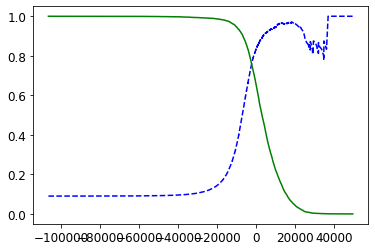

In [47]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [48]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
#前面precision_recall_curve已有設thresholds
# return the biggest number in the numpy array
# if multiple-> return the first one

In [49]:
threshold_90_precision

3370.0194991439557

In [50]:
# y_scores : use cross_val_predicit
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [51]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [52]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

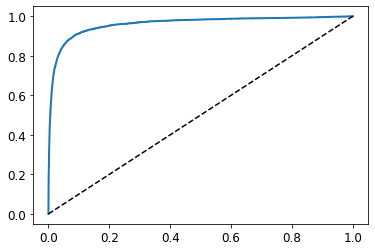

In [54]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()


In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

In [58]:
#instead of using fit()

In [59]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

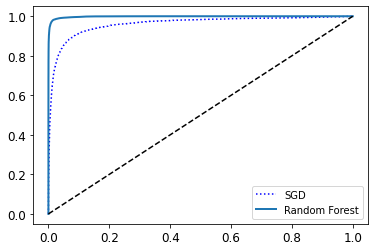

In [60]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
#前面plot_roc_surve已經有define過black dotted line
plt.legend(loc="lower right")
plt.show()

In [61]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [62]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [63]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)

In [64]:
from sklearn.svm import SVC #multiclasses

In [65]:
svm_clf = SVC()

In [66]:
svm_clf.fit(X_train, y_train) #not y_train_5

SVC()

In [67]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [68]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [69]:
some_digit_scores # return 10 scores, 5 is the highest

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [70]:
np.argmax(some_digit_scores)

5

In [71]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [72]:
from sklearn.multiclass import OneVsRestClassifier

In [73]:
ovr_clf = OneVsRestClassifier(SVC())
# the training time is so long

In [74]:
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [75]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [76]:
len(ovr_clf.estimators_)

10

In [77]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [78]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [79]:
sgd_clf.decision_function([some_digit])
# return one value per class


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [80]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
 X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


In [84]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [85]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [86]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [87]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

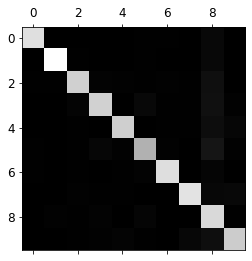

In [88]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [89]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums


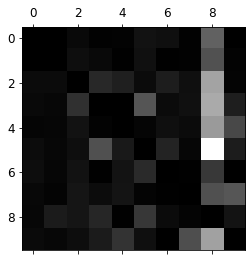

In [90]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [91]:
import matplotlib
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

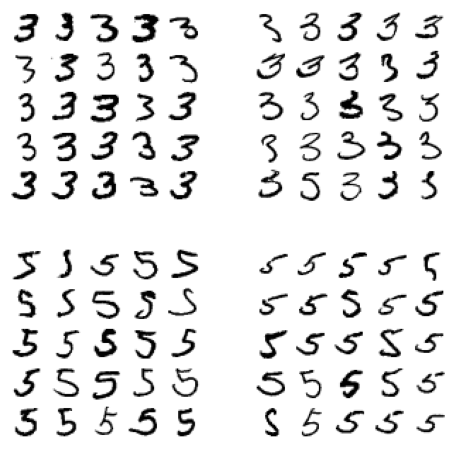

In [92]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show() # left side is predicted 3
# right side is predicted 5

In [93]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [94]:
knn_clf.predict([some_digit])
# 5

array([[False,  True]])

In [95]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [96]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [100]:
some_index = 0


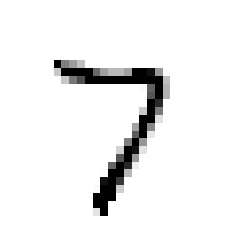

In [102]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digits(clean_digit)